####CASE BASED 2

###Explorasi Data

In [161]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
missValue = "?"
df = pd.read_csv('water_treatment.csv', sep=",", na_values = missValue)
df

,Days,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [163]:
print("Ukuran Tabel :  ", df.shape)
print("Jumlah NULL : ", df.isnull().sum().sum())

Ukuran Tabel :   (527, 39)
Jumlah NULL :  591


In [164]:
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      527 non-null    object 
 1   Q-E       509 non-null    float64
 2   ZN-E      524 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    float64
 5   DQO-E     521 non-null    float64
 6   SS-E      526 non-null    float64
 7   SSV-E     516 non-null    float64
 8   SED-E     502 non-null    float64
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    float64
 12  SS-P      527 non-null    int64  
 13  SSV-P     516 non-null    float64
 14  SED-P     503 non-null    float64
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    float64
 18  DQO-D     518 non-null    float64
 19  SS-D      525 non-null    float64
 20  SSV-D     514 non-null    float6

### Preprocessing





In [166]:
#mengecek data duplikat
df.duplicated().sum()

0

In [167]:
#mengecek dan mengatasi missing value
df.isnull().sum()

Days         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
 RD-SS-G     8
RD-SED-G    31
dtype: int64

In [168]:
df['Q-E'].fillna(df['Q-E'].mean(), inplace = True)
df['ZN-E'].fillna(df['ZN-E'].mean(), inplace = True)
df['DBO-E'].fillna(df['DBO-E'].mean(), inplace = True)
df['DQO-E'].fillna(df['DQO-E'].mean(), inplace = True)
df['SS-E'].fillna(df['SS-E'].mean(), inplace = True)
df['SSV-E'].fillna(df['SSV-E'].mean(), inplace = True)
df['SED-E'].fillna(df['SED-E'].mean(), inplace = True)
df['DBO-P'].fillna(df['DBO-P'].mean(), inplace = True)
df['SSV-P '].fillna(df['SSV-P '].mean(), inplace = True)
df['SED-P'].fillna(df['SED-P'].mean(), inplace = True)
df['DBO-D'].fillna(df['DBO-D'].mean(), inplace = True)
df['DQO-D'].fillna(df['DQO-D'].mean(), inplace = True)
df['SS-D'].fillna(df['SS-D'].mean(), inplace = True)
df['SSV-D'].fillna(df['SSV-D'].mean(), inplace = True)
df['SED-D'].fillna(df['SED-D'].mean(), inplace = True)
df['PH-S'].fillna(df['PH-S'].mean(), inplace = True)
df['DBO-S'].fillna(df['DBO-S'].mean(), inplace = True)
df['DQO-S'].fillna(df['DQO-S'].mean(), inplace = True)
df['SS-S'].fillna(df['SS-S'].mean(), inplace = True)
df['SSV-S'].fillna(df['SSV-S'].mean(), inplace = True)
df['SED-S'].fillna(df['SED-S'].mean(), inplace = True)
df['COND-S'].fillna(df['COND-S'].mean(), inplace = True)
df['RD-DBO-P'].fillna(df['RD-DBO-P'].mean(), inplace = True)
df['RD-SS-P'].fillna(df['RD-SS-P'].mean(), inplace = True)
df['RD-SED-P'].fillna(df['RD-SED-P'].mean(), inplace = True)
df['RD-DBO-S'].fillna(df['RD-DBO-S'].mean(), inplace = True)
df['RD-DQO-S'].fillna(df['RD-DQO-S'].mean(), inplace = True)
df['RD-DBO-G'].fillna(df['RD-DBO-G'].mean(), inplace = True)
df['RD-DQO-G'].fillna(df['RD-DQO-G'].mean(), inplace = True)
df[' RD-SS-G'].fillna(df[' RD-SS-G'].mean(), inplace = True)
df['RD-SED-G'].fillna(df['RD-SED-G'].mean(), inplace = True)

In [169]:
df.isnull().sum()

Days        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
 RD-SS-G    0
RD-SED-G    0
dtype: int64

In [170]:
#normalisasi data
dfnew = df.iloc[:,1:39]
x = dfnew
newData = (x-x.min())/(x.max()-x.min())
newData


,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,0.680598,0.041916,0.500000,0.387504,0.379070,0.035602,0.739554,0.115169,0.565723,0.500000,...,0.403122,0.490265,0.589207,0.951246,0.869920,0.719078,0.896817,0.762991,0.864198,0.993711
1,0.579121,0.086826,0.444444,0.387504,0.420930,0.060733,0.779944,0.171348,0.778984,0.333333,...,0.583716,0.490265,0.610132,0.943662,0.869920,0.832285,0.896817,0.764259,0.918070,1.000000
2,0.443305,0.146707,0.388889,0.387504,0.519767,0.046073,0.789694,0.084270,0.393563,0.333333,...,0.368840,0.490265,0.582599,0.952329,0.869920,0.539832,0.896817,0.717364,0.879910,0.976415
3,0.499151,0.101796,0.555556,0.427518,0.589535,0.049215,0.729805,0.115169,0.689802,0.416667,...,0.354148,0.414013,0.648678,0.949079,0.914451,0.743187,0.912145,0.799747,0.890011,1.000000
4,0.537147,0.041916,0.611111,0.518428,0.482558,0.040838,0.718663,0.101124,0.565723,0.500000,...,0.439853,0.490265,0.632159,0.952329,0.869920,0.729560,0.936693,0.747782,0.866442,0.992138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.453179,0.001796,0.444444,0.152334,0.198837,0.040838,0.607242,0.053371,0.094223,0.333333,...,0.079278,0.490265,0.627753,0.927411,0.712139,0.780922,0.775194,0.752852,0.968575,0.993711
523,0.469409,0.006587,0.500000,0.395577,0.308140,0.038743,0.771588,0.101124,0.130671,0.416667,...,0.081726,0.490265,0.583700,0.976165,0.864740,0.604822,0.923773,0.702155,0.902357,1.000000
524,0.457157,0.005988,0.277778,0.265356,0.332558,0.042932,0.713092,0.073034,0.158589,0.166667,...,0.138659,0.490265,0.657489,0.968581,0.786127,0.681342,0.806202,0.733840,0.882155,0.984277
525,0.442526,0.005988,0.222222,0.415233,0.539535,0.083770,0.722841,0.101124,0.236138,0.083333,...,0.196817,0.499363,0.667401,0.968581,0.849711,0.728512,0.903101,0.859316,0.888889,0.996855


In [171]:
#Reduksi Dimnsi menggunakan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(newData)
data_pca = pca.transform(newData)
data_pca = pd.DataFrame(data_pca,columns=['PCA1','PCA2'])
data_pca


,PCA1,PCA2
0,-0.255915,0.075512
1,-0.565514,0.118694
2,-0.080934,-0.089380
3,-0.520519,0.090031
4,-0.351181,0.213483
...,...,...
522,0.525919,-0.329392
523,0.246733,-0.252268
524,0.401597,-0.256377
525,0.293992,-0.077978


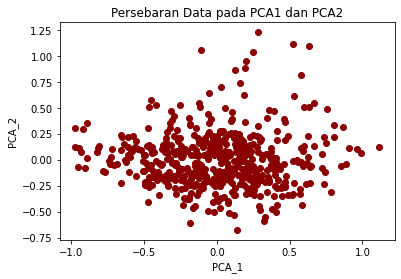

In [172]:
plt.scatter(data_pca.PCA1, data_pca.PCA2, color = '#8B0000')
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title('Persebaran Data pada PCA1 dan PCA2')
plt.show()

###Clustering K-Means

In [196]:
#euclidean distance
def distance(x1,x2,cls1,cls2):
  jarak = math.sqrt((x1-cls1)**2 +(cls2-x2)**2)
  return jarak

In [197]:
#Clustering K Means
import statistics
c1 = data_pca['PCA1'][0]
c3 = data_pca['PCA1'][1]
c2 = data_pca['PCA2'][0]
c4 = data_pca['PCA2'][1]

a = 1
while(True):
  print("Iterasi Ke- ",a)
  x1 = []
  y1 = []
  cen1 = {
      "PCA 1":x1,
      "PCA 2":y1,}
  point1 = pd.DataFrame(cen1)


  x2 = []
  y2 = []
  cen2 = {
      "PCA 1":x2,
      "PCA 2":y2,}
  point2 = pd.DataFrame(cen2)

  print("Centroid 1: (",c1,",",c2,")")
  print("Centroid 2: (",c3,",",c4,")")

  for j in range(len(data_pca)):
    jarak1 = distance(data_pca['PCA1'][j],data_pca['PCA2'][j],c1,c2)
    jarak2 = distance(data_pca['PCA1'][j],data_pca['PCA2'][j],c3,c4)
    if jarak1 < jarak2 :
      x1.append(data_pca['PCA1'][j])
      y1.append(data_pca['PCA2'][j])
    else:
      x2.append(data_pca['PCA1'][j])
      y2.append(data_pca['PCA2'][j]) 

  #mean
  m1 = statistics.mean(x1)
  m2 = statistics.mean(y1)

  m3 = statistics.mean(x2)
  m4 = statistics.mean(y2) 

  if(m1 == c1 and m2 == c2 and m3 == c3 and m4 == c4):
    break
  else:
    c1 = m1
    c2 = m2
    c3 = m3
    c4 = m4

  a = a + 1
  point1 = pd.DataFrame(cen1)
  print(point1)


Iterasi Ke-  1
Centroid 1: ( -0.2559152717886307 , 0.07551199361008404 )
Centroid 2: ( -0.5655142839436794 , 0.11869411207542559 )
        PCA 1     PCA 2
0   -0.255915  0.075512
1   -0.080934 -0.089380
2   -0.351181  0.213483
3   -0.288886 -0.047838
4   -0.286799  0.053720
..        ...       ...
455  0.525919 -0.329392
456  0.246733 -0.252268
457  0.401597 -0.256377
458  0.293992 -0.077978
459  0.453588 -0.244288

[460 rows x 2 columns]
Iterasi Ke-  2
Centroid 1: ( 0.09080723129845931 , -0.008412270031792046 )
Centroid 2: ( -0.623452632795392 , 0.05775588380036349 )
        PCA 1     PCA 2
0   -0.255915  0.075512
1   -0.080934 -0.089380
2    0.037468  0.266492
3    0.052134 -0.160321
4   -0.183080 -0.612642
..        ...       ...
401  0.525919 -0.329392
402  0.246733 -0.252268
403  0.401597 -0.256377
404  0.293992 -0.077978
405  0.453588 -0.244288

[406 rows x 2 columns]
Iterasi Ke-  3
Centroid 1: ( 0.14836764439392225 , -0.012038406286832462 )
Centroid 2: ( -0.49782862499117697 , 0

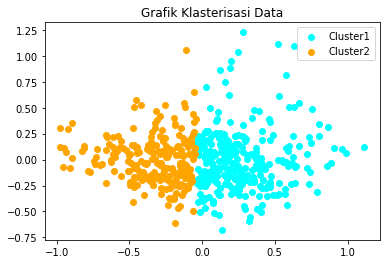

In [204]:
plt.scatter(cen1['PCA 1'], cen1['PCA 2'], color = 'cyan', label='Cluster1')
plt.scatter(cen2['PCA 1'], cen2['PCA 2'], color = 'orange', label='Cluster2')
plt.title("Grafik Klasterisasi Data")
plt.legend()
plt.show()

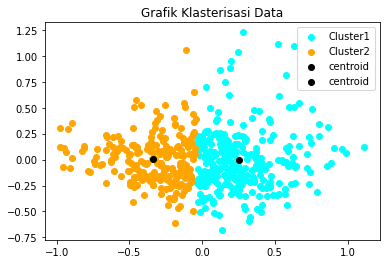

In [ ]:
plt.scatter(cen1['PCA 1'], cen1['PCA 2'], color = 'cyan', label='Cluster1')
plt.scatter(cen2['PCA 1'], cen2['PCA 2'], color = 'orange', label='Cluster2')
plt.scatter(c1, c2, color = 'black' , label='centroid')
plt.scatter(c3, c4, color = 'black', label='centroid')
plt.title("Grafik Klasterisasi Data")
plt.legend()
plt.show()